In [11]:
!pip install scikit-image scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   -------------- ------------------------- 3.9/10.7 MB 23.4 MB/s eta 0:00:01
   --------------------------- ------------ 7.3/10.7 MB 20.6 MB/s eta 0:00:01
   ------------------------------------ --- 9.7/10.7 MB 17.3 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 16.7 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit

In [13]:
!pip install pandas


  Using cached pandas-2.3.0-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.0-cp310-cp310-win_amd64.whl (11.1 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas

In [25]:
import nibabel as nib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage.transform import rotate
from skimage.util import montage
import os
from sklearn.model_selection import train_test_split
import keras
import cv2
import tensorflow
import random
from keras.layers import *
from keras.models import *
import numpy as np
from keras.callbacks import CSVLogger
import keras.backend as K
import zipfile
import pandas as pd
from keras.utils import *

In [ ]:
# !kaggle datasets download -d awsaf49/brats20-dataset-training-validation


Dataset URL: https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation
License(s): CC0-1.0




  0%|          | 0.00/4.16G [00:00<?, ?B/s]
  1%|          | 51.0M/4.16G [00:00<00:08, 529MB/s]
  2%|▏         | 105M/4.16G [00:00<00:07, 545MB/s] 
  4%|▍         | 161M/4.16G [00:00<00:07, 564MB/s]
  5%|▌         | 215M/4.16G [00:00<00:13, 321MB/s]
  6%|▌         | 255M/4.16G [00:00<00:13, 319MB/s]
  7%|▋         | 294M/4.16G [00:00<00:12, 341MB/s]
  8%|▊         | 332M/4.16G [00:00<00:11, 351MB/s]
  9%|▉         | 378M/4.16G [00:01<00:10, 381MB/s]
 10%|▉         | 426M/4.16G [00:01<00:09, 413MB/s]
 11%|█         | 474M/4.16G [00:01<00:09, 434MB/s]
 12%|█▏        | 518M/4.16G [00:01<00:08, 442MB/s]
 13%|█▎        | 562M/4.16G [00:01<00:08, 445MB/s]
 14%|█▍        | 606M/4.16G [00:01<00:09, 426MB/s]
 15%|█▌        | 648M/4.16G [00:01<00:08, 423MB/s]
 16%|█▋        | 699M/4.16G [00:01<00:08, 455MB/s]
 17%|█▋        | 743M/4.16G [00:01<00:08, 438MB/s]
 18%|█▊        | 787M/4.16G [00:01<00:08, 440MB/s]
 20%|█▉        | 833M/4.16G [00:02<00:07, 451MB/s]
 21%|██        | 877M/4.16G [00:02<

In [ ]:
# path_to_zip_file = "brats20-dataset-training-validation.zip"
# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall("brats20-dataset-training-validation")

In [ ]:
# # Absolute path of the incorrectly named file
# old_name = "brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/W39_1998.09.19_Segm.nii"
# new_name = "brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_seg.nii"

# try: 
#     os.rename(old_name, new_name)
#     print("The file has been successfully renamed")
# except FileNotFoundError:
#     print("Maybe you have already renamed the file or the file is not misspelled on the dataset anymore")

The file has been successfully renamed


In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1
Available GPU(s):
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


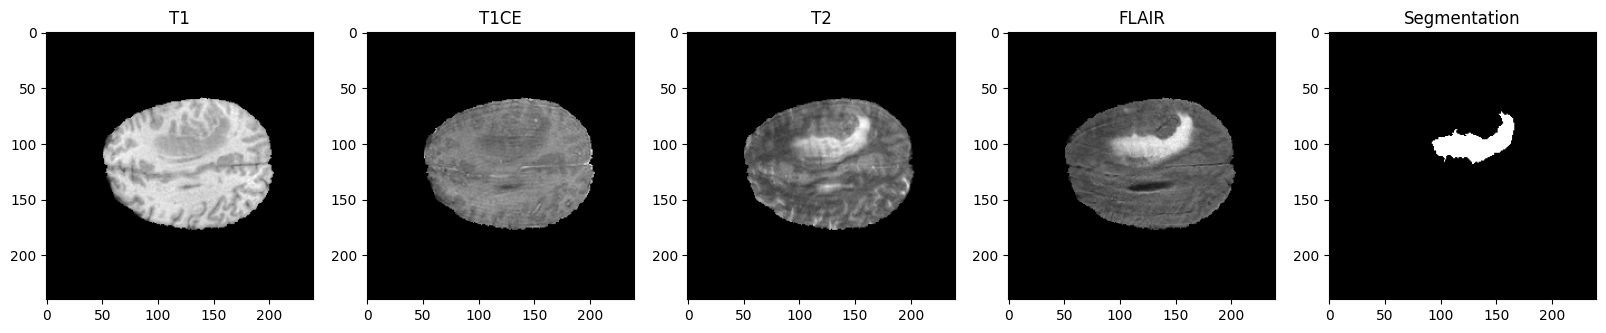

In [4]:
sample_path = 'brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_'

t1_img=nib.load(sample_path + 't1.nii')
t1ce_img=nib.load(sample_path + 't1ce.nii')
t2_img=nib.load(sample_path + 't2.nii')
flair_img=nib.load(sample_path + 'flair.nii')
seg_img=nib.load(sample_path + 'seg.nii')

# Get the image data from the nibabel images
t1_data = t1_img.get_fdata()
t1ce_data = t1ce_img.get_fdata()
t2_data = t2_img.get_fdata()
flair_data = flair_img.get_fdata()
seg_data = seg_img.get_fdata()

# select the 100th slice along the axial z-axis of the 4 RMI modalities and the segmentation(can choose any slice)
#medical images are in general 3d so we can pic any 2d to display
slice_nb = 100

fig, axs = plt.subplots(1, 5, figsize=(20,20))
axs[0].imshow(t1_data[:,:,slice_nb], cmap="gray")
axs[0].set_title('T1')
axs[1].imshow(t1ce_data[:,:,slice_nb], cmap="gray")
axs[1].set_title('T1CE')
axs[2].imshow(t2_data[:,:,slice_nb], cmap="gray")
axs[2].set_title('T2')
axs[3].imshow(flair_data[:,:,slice_nb], cmap="gray")
axs[3].set_title('FLAIR')
axs[4].imshow(seg_data[:,:,slice_nb], cmap="gray")
axs[4].set_title('Segmentation')
plt.show()

In [ ]:
# Modality shape
print(t1_data.shape)

# Segmentation shape
print(seg_data.shape)

(240, 240, 155)
(240, 240, 155)


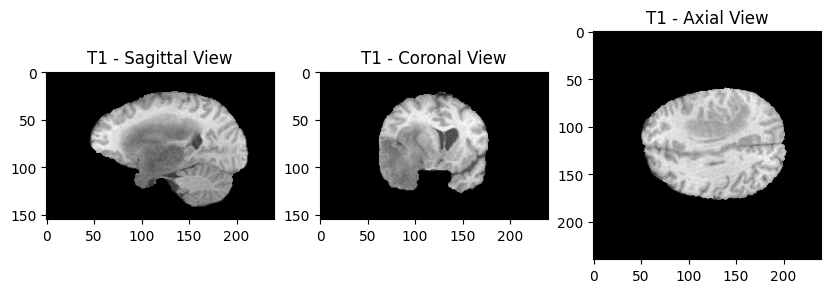

In [6]:
# Plot a RMI modality through all planes
slice_nb = 100

fig, axs2 = plt.subplots(1, 3, figsize=(10,10))

# Apply a 90° rotation with an automatic resizing, otherwise the display is less obvious to analyze
axs2[0].imshow(rotate(t1_data[slice_nb,:,:], 90, resize=True), cmap="gray")
axs2[0].set_title('T1 - Sagittal View')

axs2[1].imshow(rotate(t1_data[:,slice_nb,:], 90, resize=True), cmap="gray")
axs2[1].set_title('T1 - Coronal View')

axs2[2].imshow(t1_data[:,:,slice_nb], cmap="gray")
axs2[2].set_title('T1 - Axial View')

plt.show()

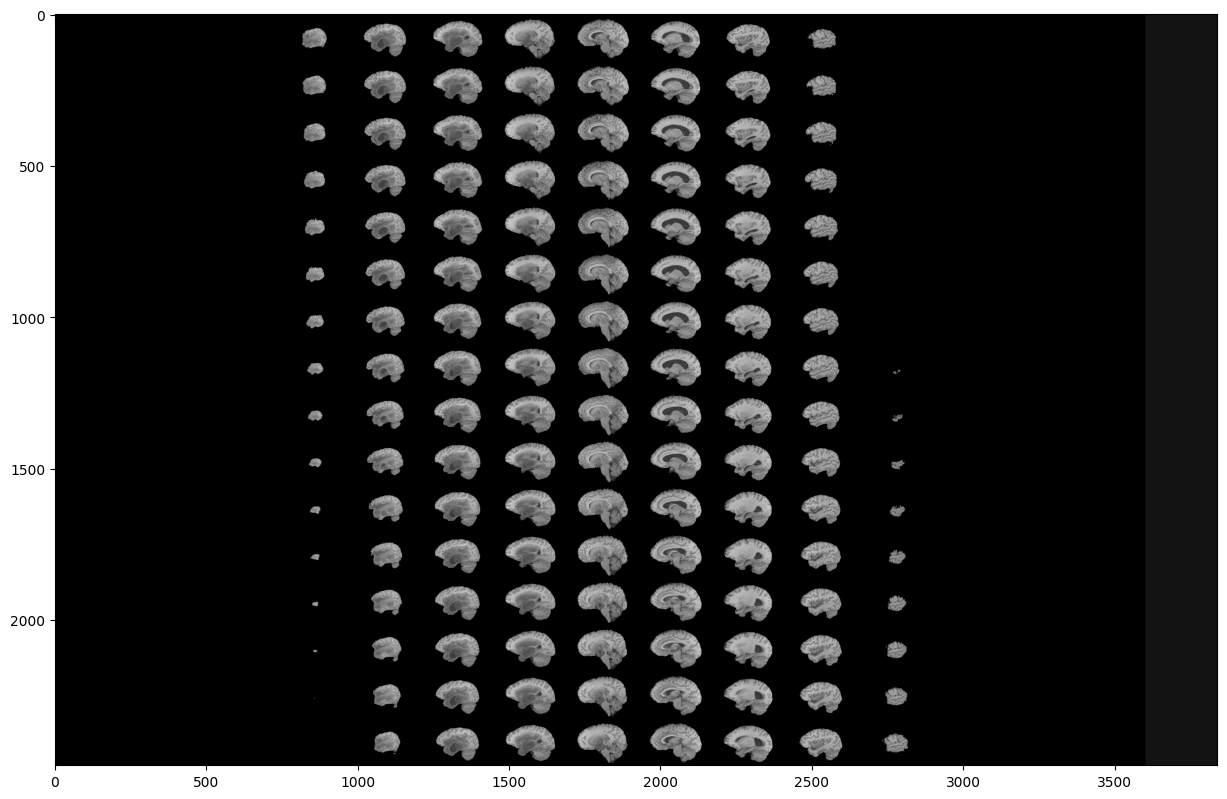

In [7]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(t1_data[:,:,:]), 90, resize=True), cmap ='gray')

# montage allows us to concatenate multiple images of the same size horizontally and vertically

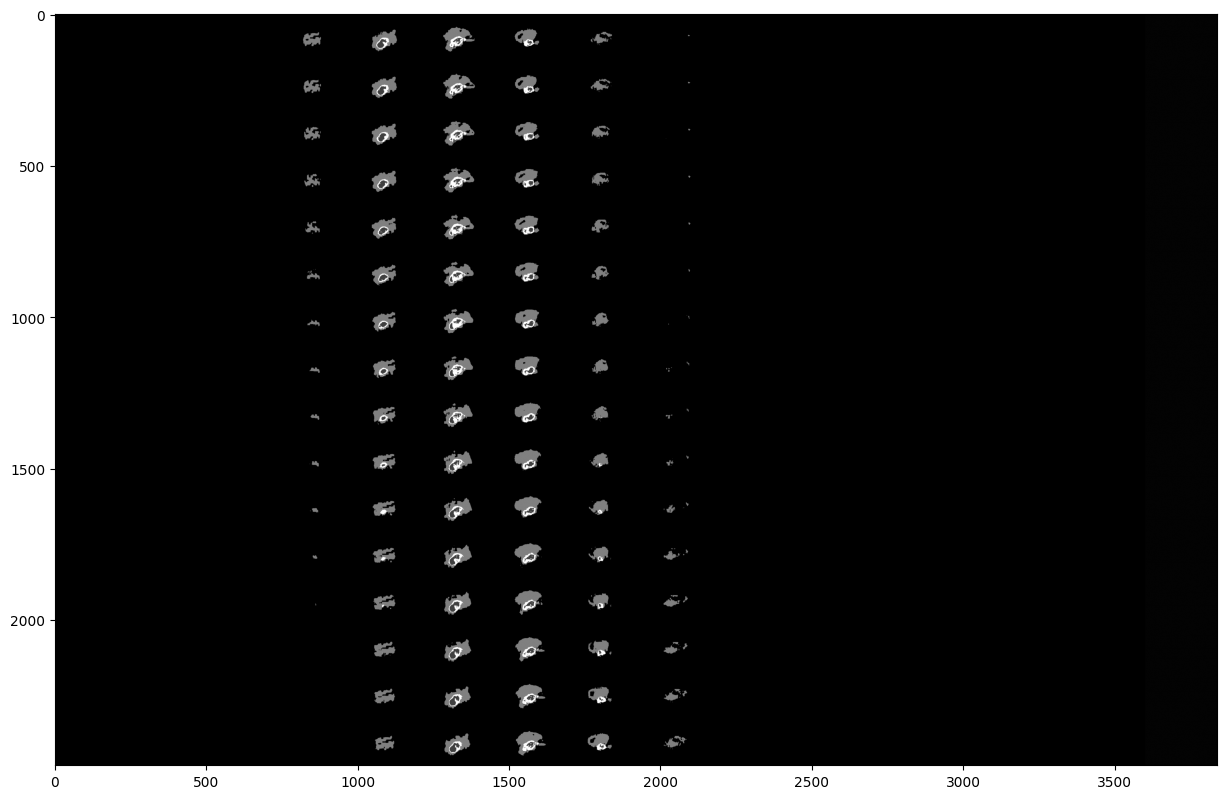

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(seg_data[:,:,:]), 90, resize=True), cmap ='gray')

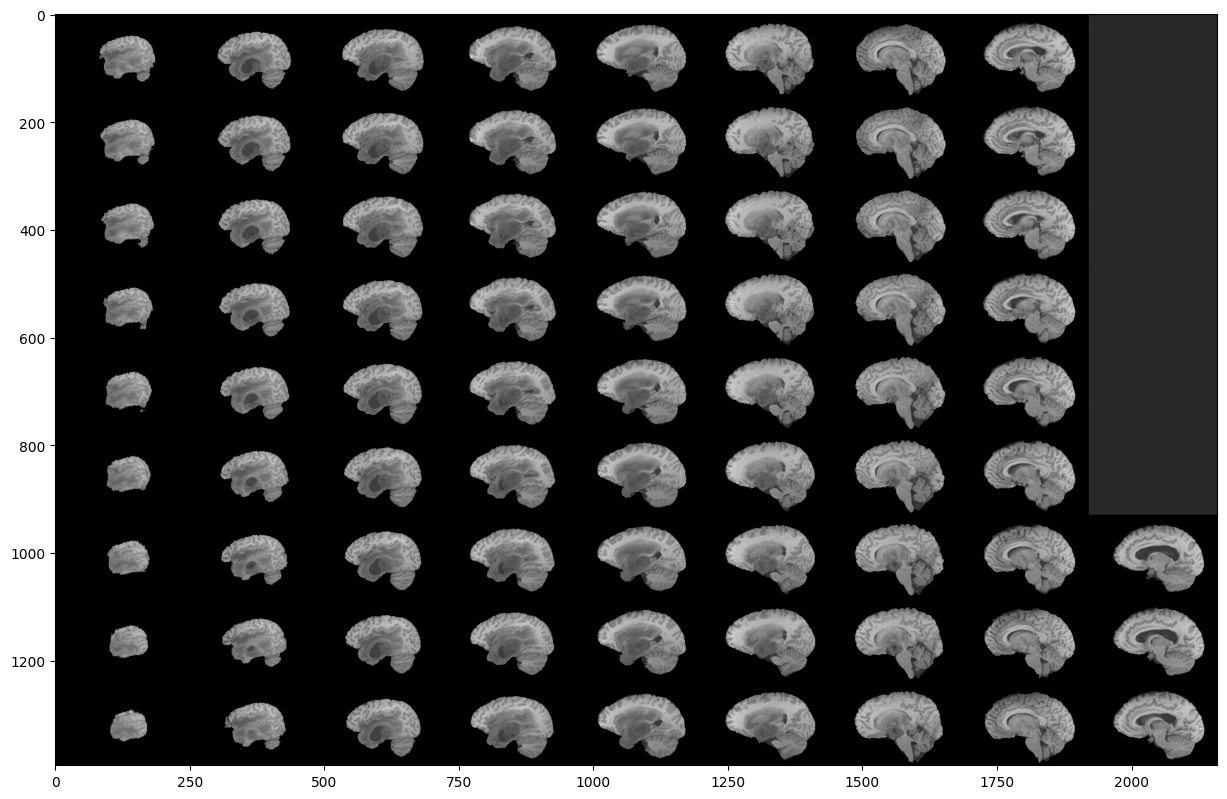

In [10]:
# see that a (60:135) range will be much more interesting:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(t1_data[60:135,:,:]), 90, resize=True), cmap ='gray')

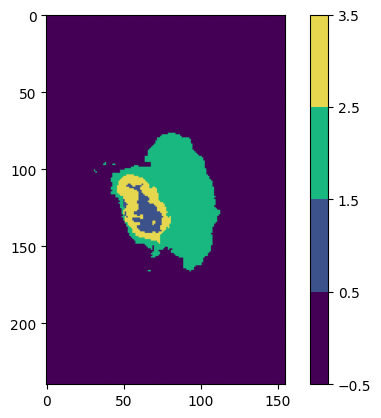

In [15]:
# Plot a segmantation
some_seg_img = nib.load("brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii").get_fdata()

cmap = mpl.colors.ListedColormap(['#440054', '#3b528b', '#18b880', '#e6d74f'])
norm = mpl.colors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5], cmap.N)

plt.imshow(some_seg_img[100,:,:], cmap=cmap, norm=norm)
plt.colorbar()

In [12]:
data_path = "brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
seg_samples = [os.path.join(data_path, sample, f"{sample}_seg.nii") for sample in os.listdir(data_path) if not sample.endswith('.csv')]

saved_values = []
max_nb_values = 0
for sample in seg_samples:
    seg_img = nib.load(sample).get_fdata()
    unique_values = np.unique(seg_img)
    nb_unique_values = len(np.unique(seg_img))
    
    if nb_unique_values > max_nb_values:
        max_nb_values = nb_unique_values
        saved_values = unique_values

print(f"Maximum number of values in all segmentation images: {max_nb_values}")
print(f"Values: {saved_values}")

Maximum number of values in all segmentation images: 4
Values: [0. 1. 2. 4.]


In [16]:

values, counts = np.unique(some_seg_img, return_counts=True)
print(counts)

[8716021   15443  168794   27742]


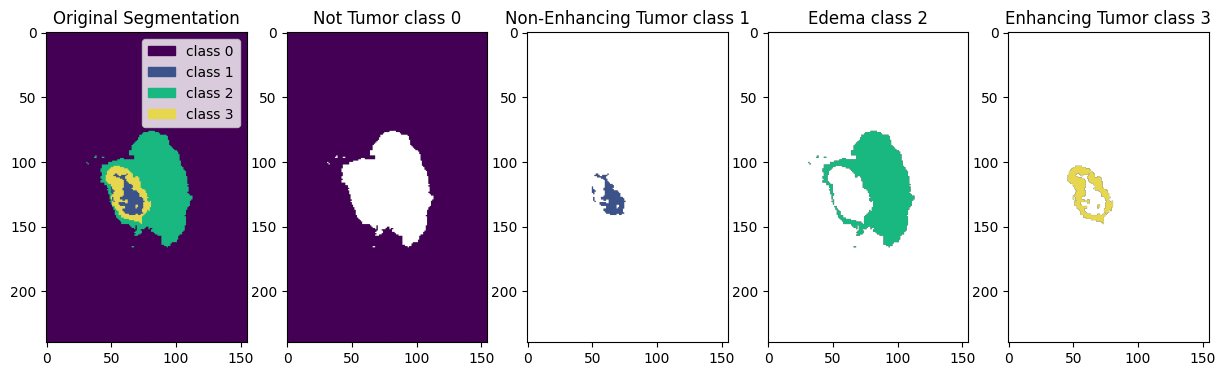

In [ ]:
# Deletion of class 0
seg_0 = some_seg_img.copy()
seg_0[seg_0 != 0] = np.nan
#isolation of class 1
seg_1 = some_seg_img.copy()
seg_1[seg_1 != 1] = np.nan

seg_2 = some_seg_img.copy()
seg_2[seg_2 != 2] = np.nan

seg_3 = some_seg_img.copy()
seg_3[seg_3 != 4] = np.nan

# Define legend
class_names = ['class 0', 'class 1', 'class 2', 'class 3']
legend = [plt.Rectangle((0, 0), 1, 1, color=cmap(i), label=class_names[i]) for i in range(len(class_names))]

fig, axs3 = plt.subplots(1, 5, figsize=(15, 15))

axs3[0].imshow(some_seg_img[100,:,:], cmap=cmap, norm=norm)
axs3[0].set_title('Original Segmentation')
axs3[0].legend(handles=legend, loc='upper right')

axs3[1].imshow(seg_0[100,:,:], cmap=cmap, norm=norm)
axs3[1].set_title('Not Tumor class 0')

axs3[2].imshow(seg_1[100,:,:], cmap=cmap, norm=norm)
axs3[2].set_title('Non-Enhancing Tumor class 1')

axs3[3].imshow(seg_2[100,:,:], cmap=cmap, norm=norm)
axs3[3].set_title('Edema class 2')

axs3[4].imshow(seg_3[100,:,:], cmap=cmap, norm=norm)
axs3[4].set_title('Enhancing Tumor class 3')

plt.show()

In [59]:
VOLUME_START_AT = 70
VOLUME_SLICES = 50

In [60]:

data_path = "brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
samples = os.listdir(data_path)
print("Number of samples:", len(samples))

Number of samples: 371


In [61]:
samples.remove("survival_info.csv")
samples.remove("name_mapping.csv")

In [62]:

samples_train, samples_val = train_test_split(samples, test_size=0.2, random_state=42)

samples_train, samples_test = train_test_split(samples_train, test_size=0.15, random_state=42)
# Train: 68%, Test: 12%, Val: 20%
print(f"Train length: {len(samples_train)}")
print(f"Validation length: {len(samples_val)}")
print(f"Test length: {len(samples_test)}")

Train length: 250
Validation length: 74
Test length: 45


In [63]:
IMG_SIZE = 128
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, dim=(IMG_SIZE,IMG_SIZE), batch_size = 1, n_channels = 2, shuffle=True):
        'Initialization'
        self.dim = dim # Resized image dimensions (128 x 128)
        self.batch_size = batch_size #  Number of images to load each time
        self.list_IDs = list_IDs # patient folder names (BraTS20_Training_001)
        self.n_channels = n_channels # Number of channels (T1CE + FLAIR)
        self.shuffle = shuffle # Indicates if data is shuffled for each epoch
        self.on_epoch_end() # Updates indexes after each epoch

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        Batch_ids = [self.list_IDs[k] for k in indexes]

        X, y = self.__data_generation(Batch_ids)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        'Generates data containing batch_size samples'
        X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
        y = np.zeros((self.batch_size*VOLUME_SLICES, 240, 240))

        for c, j in enumerate(Batch_ids):
            sample_path = os.path.join(data_path, j, j)
            t1ce_path = sample_path + '_t1ce.nii'
            print(sample_path)
            flair_path = sample_path + '_flair.nii'
            seg_path = sample_path + '_seg.nii'
            t1ce = nib.load(t1ce_path).get_fdata()
            flair = nib.load(flair_path).get_fdata()
            seg = nib.load(seg_path).get_fdata()
            
             #  Check if all files exist
            if not (os.path.exists(t1ce_path) and os.path.exists(flair_path) and os.path.exists(seg_path)):
             print(f"Skipping missing files for patient: {j}")
             continue
        
            for j in range(VOLUME_SLICES):
                 X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))
                 X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(t1ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))

                 y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT]
                    
        y[y==4] = 3
        mask = tensorflow.one_hot(y, 4)
        Y = tensorflow.image.resize(mask, (IMG_SIZE, IMG_SIZE))
        
        # Scale data between 0 and 1
        return X/np.max(X), Y
        
training_generator = DataGenerator(samples_train)
valid_generator = DataGenerator(samples_val)
test_generator = DataGenerator(samples_test)

In [64]:
def build_unet(inputs, ker_init, dropout):
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(inputs)
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv1)
    
    pool = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv2)
    
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv3)
    
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv5)
    drop5 = Dropout(dropout)(conv5)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(drop5))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv8))
    merge9 = concatenate([conv,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv9)
    
    up = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = 2)(conv9))
    merge = concatenate([conv1,up], axis = 3)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    
    conv10 = Conv2D(4, 1, activation = 'softmax')(conv)
    
    return Model(inputs = inputs, outputs = conv10)

In [65]:

# Compute metric between the predicted segmentation and the ground truth
def dice_coef(y_true, y_pred, smooth=1.0):
    class_num = 4
    for i in range(class_num):
        y_true_f = K.flatten(y_true[:,:,:,i])
        y_pred_f = K.flatten(y_pred[:,:,:,i])
        intersection = K.sum(y_true_f * y_pred_f)
        loss = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
        if i == 0:
            total_loss = loss
        else:
            total_loss = total_loss + loss
    total_loss = total_loss / class_num
    return total_loss

def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())


def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [ ]:
input_layer = Input((IMG_SIZE, IMG_SIZE, 2))

model = build_unet(input_layer, 'he_normal', 0.2) #he_normal is a kernel initializer that helps to avoid vanishing gradients in deep networks

model.compile(loss="categorical_crossentropy", optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy',tensorflow.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity] )

In [67]:
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001, verbose=1),
    
    keras.callbacks.ModelCheckpoint(filepath = 'model_.{epoch:02d}-{val_loss:.6f}.m5',
                             verbose=1, save_best_only=True, save_weights_only = True),

    CSVLogger('training.log', separator=',', append=False)
]

In [68]:
model.fit(training_generator,
          epochs=35,
          steps_per_epoch=len(samples_train),
          callbacks=callbacks,
          validation_data=valid_generator)

brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_019\BraTS20_Training_019
Epoch 1/35
brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_141\BraTS20_Training_141
brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_211\BraTS20_Training_211
250/250 [==============================] - ETA: 0s - loss: 0.1502 - accuracy: 0.9742 - mean_io_u_3: 0.5830 - dice_coef: 0.2661 - precision: 0.9742 - sensitivity: 0.9642 - specificity: 0.9928brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_047\BraTS20_Training_047
brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_047\BraTS20_Training_047
brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_006\BraTS20_Training_006
brats20-datas

KeyError: 'mean_io_u'

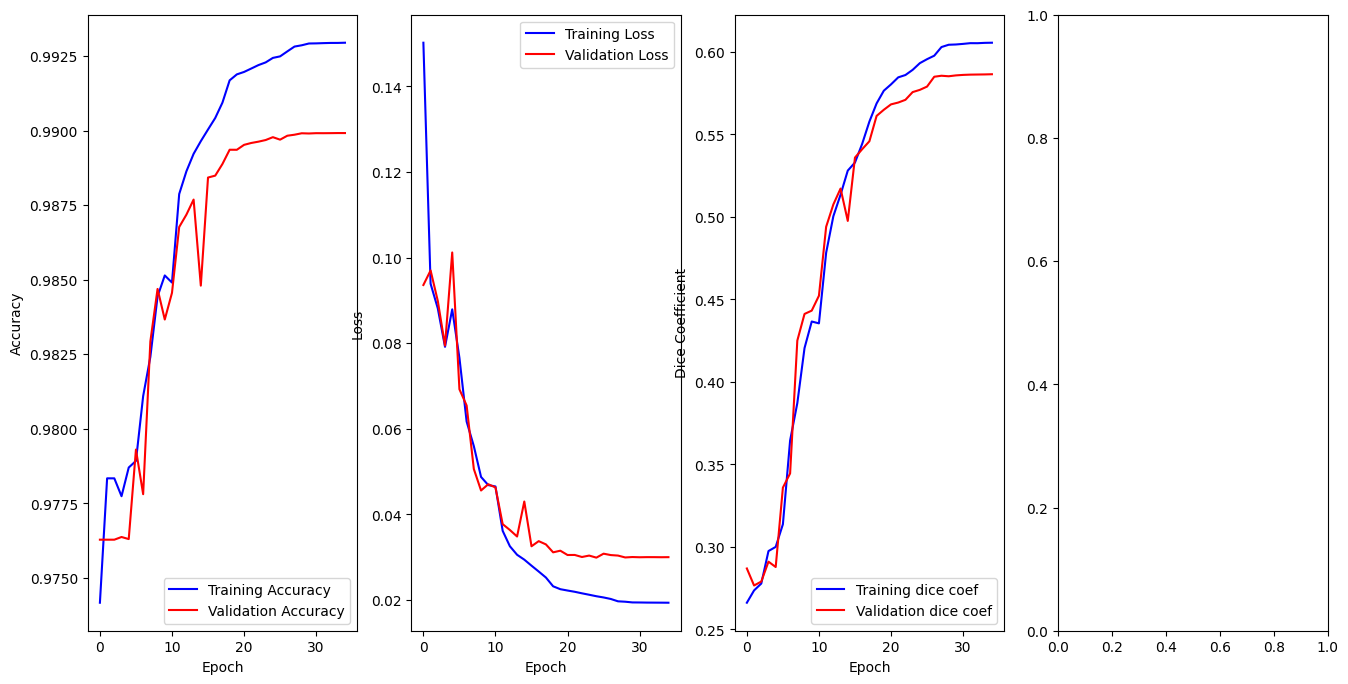

In [69]:

history = pd.read_csv('training.log', sep=',', engine='python')
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

axs[0].plot(history['epoch'], history['accuracy'], 'b', label='Training Accuracy')
axs[0].plot(history['epoch'], history['val_accuracy'], 'r', label='Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(history['epoch'], history['loss'], 'b', label='Training Loss')
axs[1].plot(history['epoch'], history['val_loss'], 'r', label='Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

axs[2].plot(history['epoch'], history['dice_coef'], 'b', label='Training dice coef')
axs[2].plot(history['epoch'], history['val_dice_coef'], 'r', label='Validation dice coef')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Dice Coefficient')
axs[2].legend()

axs[3].plot(history['epoch'], history['mean_io_u'], 'b', label='Training mean IOU')
axs[3].plot(history['epoch'], history['val_mean_io_u'], 'r', label='Validation mean IOU')
axs[3].set_xlabel('Epoch')
axs[3].set_ylabel('Mean IOU')
axs[3].legend()
plt.subplots_adjust(wspace=0.4)

plt.show()

In [70]:

# Compile a model and load our saved weights
# IMG_SIZE = 128
# input_layer = Input((IMG_SIZE, IMG_SIZE, 2))

# best_saved_model = build_unet(input_layer, 'he_normal', 0.2)

# best_saved_model.compile(loss="categorical_crossentropy", optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy',tensorflow.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity] )

# best_saved_model.load_weights('model_.26-0.025329.m5')

In [71]:
def predict_segmentation(sample_path):
    t1ce_path = sample_path + '_t1ce.nii'
    flair_path = sample_path + '_flair.nii'

    t1ce = nib.load(t1ce_path).get_fdata()
    flair = nib.load(flair_path).get_fdata()
    
    X = np.empty((VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 2))
    
    # Perform the same operations as our DataGenerator, to keep the same input shape
    for j in range(VOLUME_SLICES):
        X[j,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
        X[j,:,:,1] = cv2.resize(t1ce[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
        
    return model.predict(X/np.max(X), verbose=1)

In [ ]:
def show_predicted_segmentations(samples_list, slice_to_plot, cmap, norm):
    random_sample = random.choice(samples_list)
    random_sample_path = os.path.join(data_path, random_sample, random_sample)
    predicted_seg = predict_segmentation(random_sample_path)
    seg_path = random_sample_path + '_seg.nii'
    seg = nib.load(seg_path).get_fdata()
    seg=cv2.resize(seg[:,:,slice_to_plot+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_NEAREST)
    
    # Differentiate segmentations by their labels
    all = predicted_seg[slice_to_plot,:,:,1:4] # Deletion of class 0 (Keep only Core + Edema + Enhancing classes)
    zero = predicted_seg[slice_to_plot,:,:,0] # Isolation of class 0, Background (kind of useless, it is the opposite of the "all")
    first = predicted_seg[slice_to_plot,:,:,1] # Isolation of class 1, Core
    second = predicted_seg[slice_to_plot,:,:,2] # Isolation of class 2, Edema
    third = predicted_seg[slice_to_plot,:,:,3] # Isolation of class 3, Enhancing

    # Plot Original segmentation & predicted segmentation
    print("Patient number: ", random_sample)
    fig, axstest = plt.subplots(1, 6, figsize=(25, 20))

    # Original segmentation
    axstest[0].imshow(seg, cmap, norm)
    axstest[0].set_title('Original Segmentation')
    
    # Layers 1, 2, 3
    axstest[1].imshow(all)
    axstest[1].set_title('Predicted Segmentation - all layers')
    
    # Layer 0
    axstest[2].imshow(zero)
    axstest[2].set_title('Predicted Segmentation - layer 0')
    
    # Layer 1
    axstest[3].imshow(first)
    axstest[3].set_title('Predicted Segmentation - layer 1')
    
    # Layer 2
    axstest[4].imshow(second)
    axstest[4].set_title('Predicted Segmentation - layer 2')
    
    # Layer 3
    axstest[5].imshow(third)
    axstest[5].set_title('Predicted Segmentation - layer 3')
    
    plt.subplots_adjust(wspace=0.8)

    plt.show()

2/2 [==============================] - 0s 217ms/step
Patient number:  BraTS20_Training_112


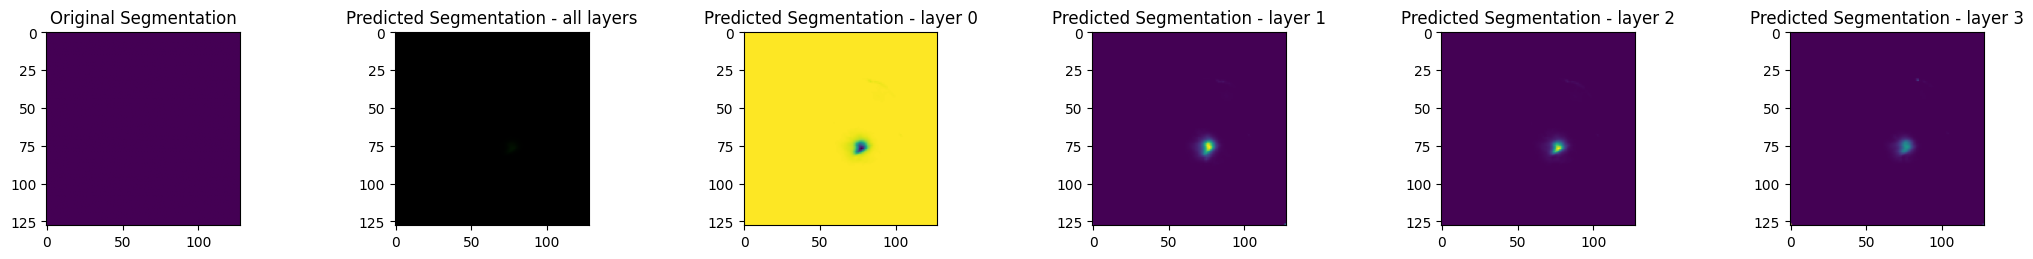

In [76]:
show_predicted_segmentations(samples_test, 40, cmap, norm)


2/2 [==============================] - 0s 283ms/step
Patient number:  BraTS20_Training_217


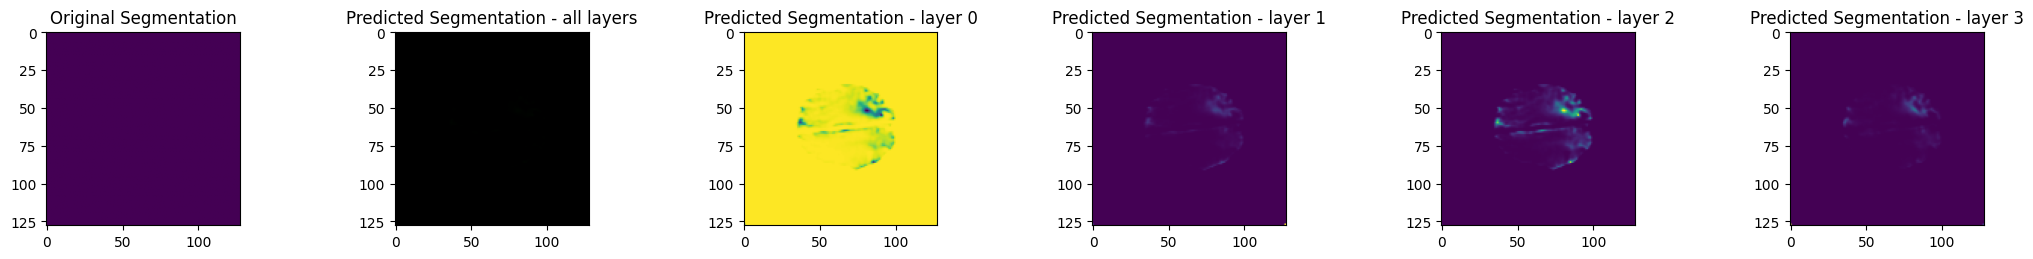

In [77]:
show_predicted_segmentations(samples_test, 40, cmap, norm)


2/2 [==============================] - 0s 338ms/step
Patient number:  BraTS20_Training_175


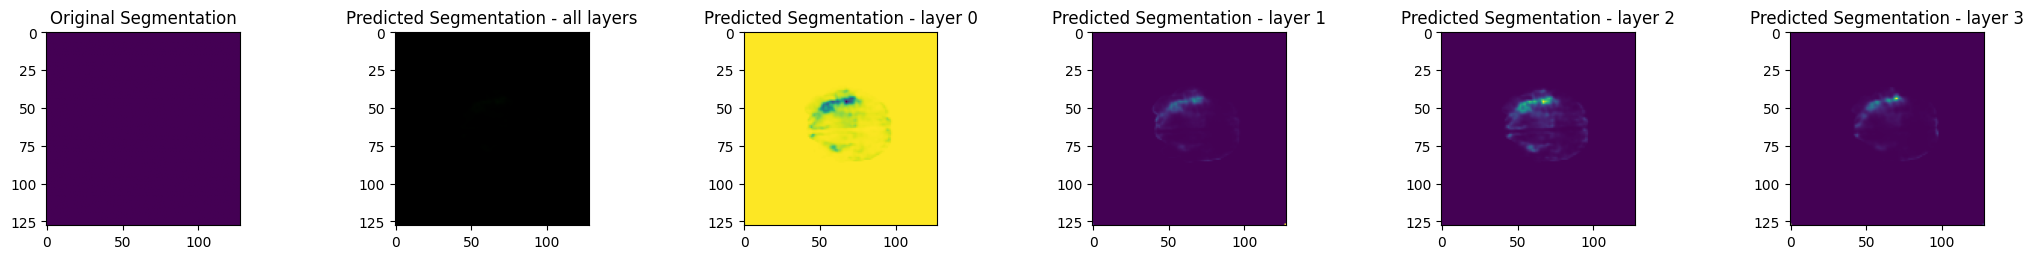

In [79]:
show_predicted_segmentations(samples_test, 49, cmap, norm)


2/2 [==============================] - 0s 383ms/step
Patient number:  BraTS20_Training_113


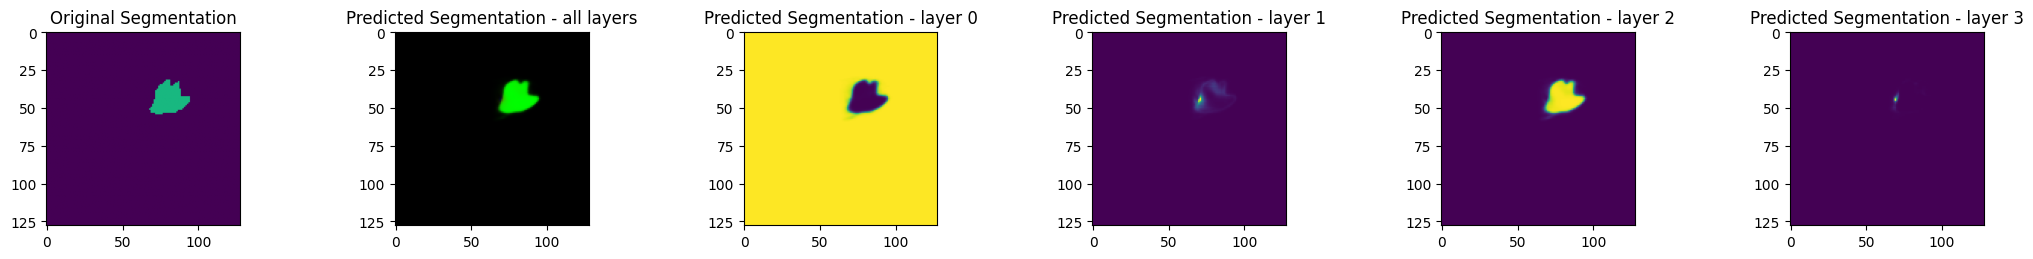

In [80]:
show_predicted_segmentations(samples_test, 30, cmap, norm)


2/2 [==============================] - 0s 294ms/step
Patient number:  BraTS20_Training_295


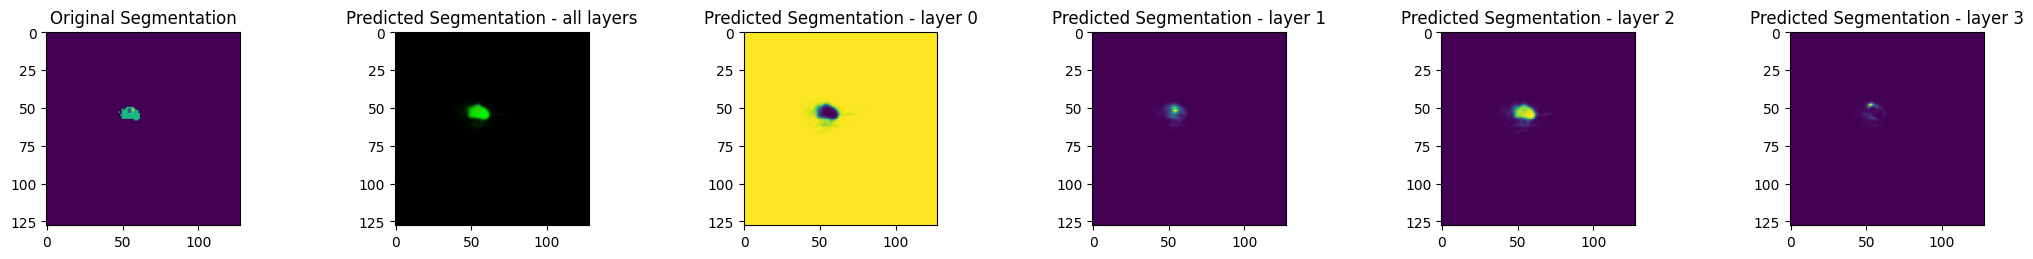

In [82]:
show_predicted_segmentations(samples_test, 30, cmap, norm)


# Post-processing

We are going to use the argmax decoding technique. This process consists in applying the argmax function to obtain a single label for each pixel, corresponding to the class with the highest probability. Indeed, our pixels currently have probability values for each class since they were obtained using the softmax activation function.

This will also allow us to have the same display colors between the original segmentation and the prediction, which will be easier to compare than just above.

We will perform these techniques on the same patients as before. This will allow to see if the correct predictions are kept, and if the false positive predictions are removed!

In [ ]:
def show_post_processed_segmentations(sample, slice_to_plot, cmap, norm):
    
    sample_path = os.path.join(data_path, sample, sample)
    predicted_seg = predict_segmentation(sample_path)
    seg_path = sample_path + '_seg.nii'
    seg = nib.load(seg_path).get_fdata()
    seg=cv2.resize(seg[:,:,slice_to_plot+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_NEAREST)
    
    seg[seg==4] = 3
    
    # Remove background layer (0) from original segmentation
    seg[seg==0] = np.nan
    
    # Post-processing
    # Get indexes for each class of the highest probability pixels. Array will then contain only [0 1 2 3] instead of probabilities
    my_pred = np.argmax(predicted_seg, axis=3)
    my_pred = my_pred[slice_to_plot, :, :]

    # Remove background layer (0) from post-processed predicted segmentation
    # To fix 0 to np.nan, we need to convert array as a float
    my_pred = my_pred.astype(float)
    my_pred[my_pred == 0] = np.nan

    # Remove background layer (0) from classical predicted segmentation
    all = predicted_seg[slice_to_plot,:,:,1:4] 
    
    # Plot Original segmentation & predicted segmentation without processing & predicted segmentation
    print("Patient number: ", sample)
    fig, axstest = plt.subplots(1, 3, figsize=(15, 10))

    axstest[0].imshow(seg, cmap, norm)
    axstest[0].set_title('Original Segmentation')
    
    axstest[1].imshow(all)
    axstest[1].set_title('Prediction (w/o post processing (layer 1,2,3)')
    
    axstest[2].imshow(my_pred, cmap, norm)
    axstest[2].set_title('Prediction (w/ post processing (layer 1,2,3)')
    plt.subplots_adjust(wspace=0.8)
    
    plt.show()

2/2 [==============================] - 0s 86ms/step
Patient number:  BraTS20_Training_112


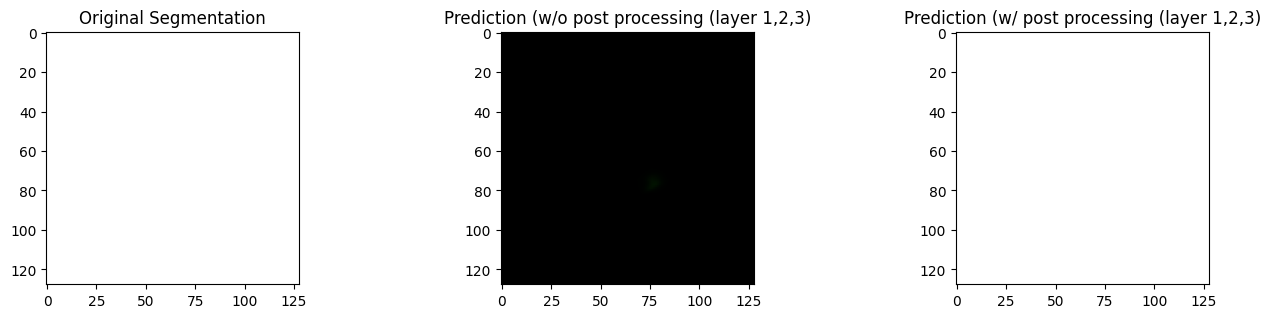

In [83]:
show_post_processed_segmentations(sample = "BraTS20_Training_112", slice_to_plot=40, cmap=cmap, norm=norm)


2/2 [==============================] - 0s 268ms/step
Patient number:  BraTS20_Training_217


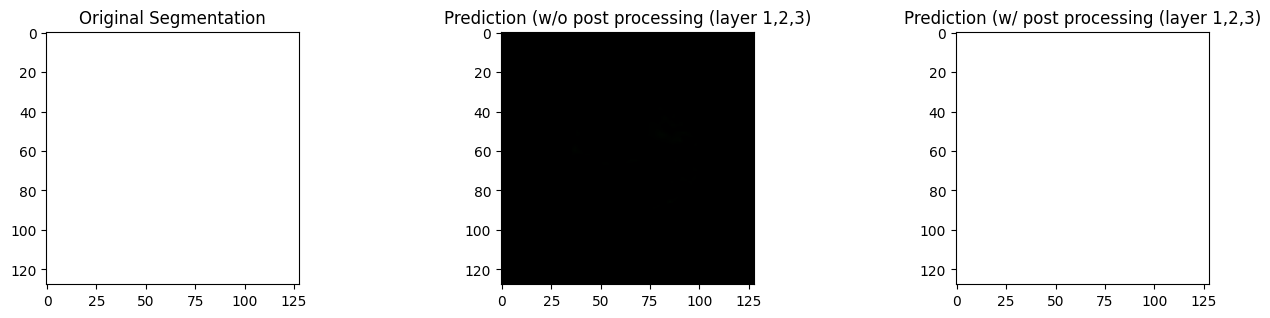

In [84]:
show_post_processed_segmentations(sample = "BraTS20_Training_217", slice_to_plot=40, cmap=cmap, norm=norm)


2/2 [==============================] - 0s 79ms/step
Patient number:  BraTS20_Training_175


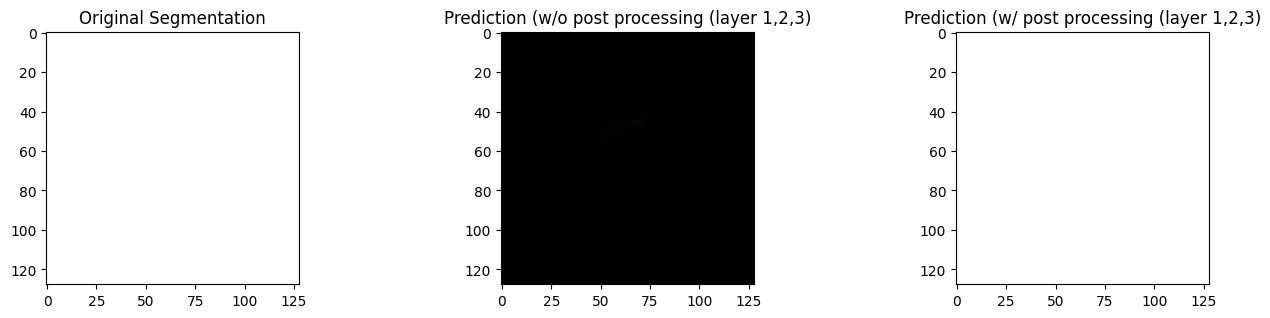

In [85]:
show_post_processed_segmentations(sample = "BraTS20_Training_175", slice_to_plot=49, cmap=cmap, norm=norm)


2/2 [==============================] - 0s 413ms/step
Patient number:  BraTS20_Training_113


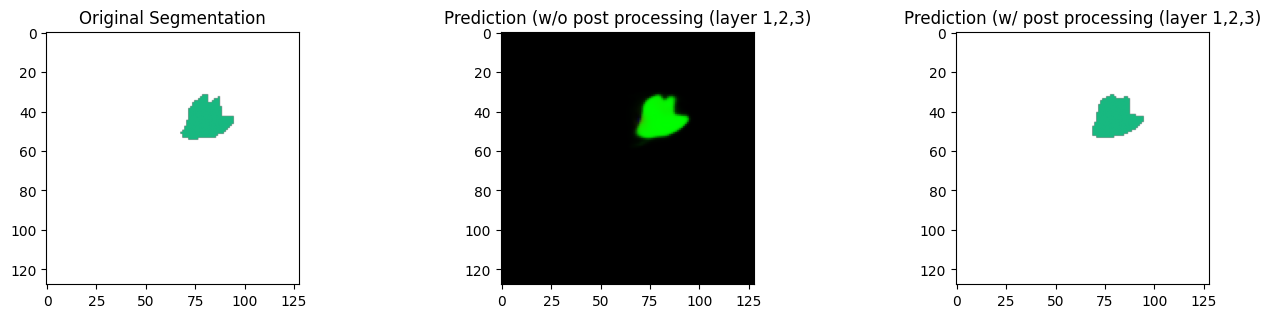

In [86]:
show_post_processed_segmentations(sample = "BraTS20_Training_113", slice_to_plot=30, cmap=cmap, norm=norm)


2/2 [==============================] - 0s 131ms/step
Patient number:  BraTS20_Training_295


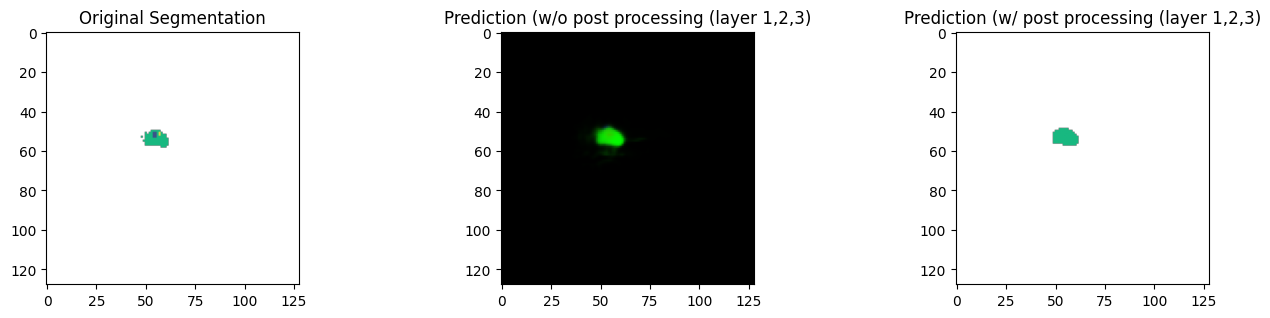

In [87]:
show_post_processed_segmentations(sample = "BraTS20_Training_295", slice_to_plot=30, cmap=cmap, norm=norm)


In [88]:
results = model.evaluate(test_generator, batch_size=100, callbacks= callbacks)
descriptions = ["Loss", "Accuracy", "MeanIOU", "Dice coefficient", "Precision", "Sensitivity", "Specificity"]
results_list = zip(results, descriptions)
print("\nModel evaluation on the test set:")
print("==================================")
for i, (metric, description) in enumerate(results_list):
    print(f"{description} : {round(metric, 4)}")

brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_257\BraTS20_Training_257
brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_257\BraTS20_Training_257
brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_277\BraTS20_Training_277
45/45 [==============================] - 8s 170ms/step - loss: 0.0365 - accuracy: 0.9882 - mean_io_u_3: 0.8116 - dice_coef: 0.5831 - precision: 0.9893 - sensitivity: 0.9859 - specificity: 0.9964

Model evaluation on the test set:
Loss : 0.0365
Accuracy : 0.9882
MeanIOU : 0.8116
Dice coefficient : 0.5831
Precision : 0.9893
Sensitivity : 0.9859
Specificity : 0.9964
